# Import libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from matplotlib import ticker
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings

# options
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
train = pd.read_csv('../input/devday22-competition-datascience/train.csv')
test = pd.read_csv('../input/devday22-competition-datascience/test.csv')
submission = pd.read_csv('../input/devday22-competition-datascience/sample_submission.csv')


# Data Analysis

In [3]:
train.head()

,ID,sequence1,sequence2,sequence3,sequence4,sequence5,sequence6,sequence7,sequence8,sequence9,...,M,N,O,P,Q,R,S,T,U,mutation
0,0,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,AAATCAGCTAAA,ATTCCATATTTT,ATTCCATATTTT,AAATCAGCTAAA,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,2,ATGCGCTTAATT,ATGCGCTTAATT,GATCGTAGCTAA,ATGCGCTTAATT,ATGCGCTTAATT,AAATCAGCTAAA,ATTCCATATTTT,ATTCCATATTTT,AAATCAGCTAAA,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
2,5,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,AAATCAGCTAAA,ATTCCATATTTT,ATTCCATATTTT,AAATCAGCTAAA,...,0.524760,0.580085,0.301498,0.261055,0.193988,0.935688,0.685868,0.277694,0.428115,0
3,7,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATTCCATATTTT,AAATCAGCTAAA,TAACATACAGAG,TAACATACAGAG,...,0.943545,0.209744,0.670577,0.772650,0.845751,0.507320,0.927204,0.605755,0.454155,1
4,9,ATGCGCTTAATT,GATCGTAGCTAA,ATGCGCTTAATT,GATCGTAGCTAA,GATCGTAGCTAA,ATTCCATATTTT,AAATCAGCTAAA,ATTCCATATTTT,TAACATACAGAG,...,0.397622,0.506096,0.200673,0.734145,0.521673,0.365571,0.416094,0.584799,0.447149,1


In [4]:
test.head()

,ID,sequence1,sequence2,sequence3,sequence4,sequence5,sequence6,sequence7,sequence8,sequence9,...,L,M,N,O,P,Q,R,S,T,U
0,1,ATGCGCTTAATT,ATGCGCTTAATT,GATCGTAGCTAA,ATGCGCTTAATT,GATCGTAGCTAA,ATTCCATATTTT,AAATCAGCTAAA,ATTCCATATTTT,AAATCAGCTAAA,...,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729
1,3,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,AAATCAGCTAAA,ATTCCATATTTT,ATTCCATATTTT,AAATCAGCTAAA,...,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242
2,4,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,GATCGTAGCTAA,AAATCAGCTAAA,AAATCAGCTAAA,ATTCCATATTTT,AAATCAGCTAAA,...,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960
3,6,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,GATCGTAGCTAA,ATTCCATATTTT,ATTCCATATTTT,ATTCCATATTTT,AAATCAGCTAAA,...,0.707840,0.678466,0.747125,0.678212,0.553609,0.281719,0.768782,0.688580,0.320699,0.642256
4,8,GATCGTAGCTAA,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,ATGCGCTTAATT,AAATCAGCTAAA,ATTCCATATTTT,ATTCCATATTTT,AAATCAGCTAAA,...,0.664718,0.635195,0.672264,0.561127,0.419873,0.508550,0.673267,0.356103,0.471519,0.499554


In [5]:
for i in range(1,10):
    print('Sequence : ',i,train.iloc[:,i].unique())


Sequence :  1 ['ATGCGCTTAATT' 'GATCGTAGCTAA']
Sequence :  2 ['ATGCGCTTAATT' 'GATCGTAGCTAA']
Sequence :  3 ['ATGCGCTTAATT' 'GATCGTAGCTAA']
Sequence :  4 ['ATGCGCTTAATT' 'GATCGTAGCTAA']
Sequence :  5 ['ATGCGCTTAATT' 'GATCGTAGCTAA']
Sequence :  6 ['AAATCAGCTAAA' 'ATTCCATATTTT' 'GTCATGCACCCT' 'TAACATACAGAG']
Sequence :  7 ['ATTCCATATTTT' 'AAATCAGCTAAA' 'TAACATACAGAG' 'GTCATGCACCCT']
Sequence :  8 ['ATTCCATATTTT' 'TAACATACAGAG' 'AAATCAGCTAAA' 'GTCATGCACCCT']
Sequence :  9 ['AAATCAGCTAAA' 'TAACATACAGAG' 'ATTCCATATTTT' 'GTCATGCACCCT']


In [6]:
train.isna().sum()

ID           0
sequence1    0
sequence2    0
sequence3    0
sequence4    0
sequence5    0
sequence6    0
sequence7    0
sequence8    0
sequence9    0
A            0
B            0
C            0
D            0
E            0
F            0
G            0
H            0
I            0
J            0
K            0
L            0
M            0
N            0
O            0
P            0
Q            0
R            0
S            0
T            0
U            0
mutation     0
dtype: int64

In [7]:
train.dtypes

ID             int64
sequence1     object
sequence2     object
sequence3     object
sequence4     object
sequence5     object
sequence6     object
sequence7     object
sequence8     object
sequence9     object
A              int64
B              int64
C              int64
D              int64
E              int64
F              int64
G              int64
H              int64
I              int64
J              int64
K            float64
L            float64
M            float64
N            float64
O            float64
P            float64
Q            float64
R            float64
S            float64
T            float64
U            float64
mutation       int64
dtype: object

In [8]:
test.isna().sum()

ID           0
sequence1    0
sequence2    0
sequence3    0
sequence4    0
sequence5    0
sequence6    0
sequence7    0
sequence8    0
sequence9    0
A            0
B            0
C            0
D            0
E            0
F            0
G            0
H            0
I            0
J            0
K            0
L            0
M            0
N            0
O            0
P            0
Q            0
R            0
S            0
T            0
U            0
dtype: int64

In [9]:
Corr = train.drop('ID',axis=1).select_dtypes(exclude=["object"]).corr()
abs_corr_on_saleprice = abs(Corr[['mutation']].copy())
abs_corr_on_saleprice.drop('mutation', axis=0, inplace=True)

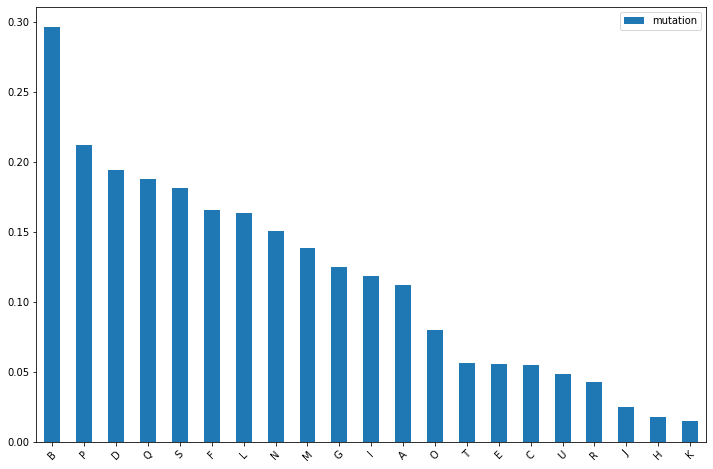

In [10]:
abs_corr_on_saleprice.sort_values(by='mutation', ascending=False).plot(kind='bar', figsize=(12,8))
plt.xticks(rotation=45)
plt.show()

In [11]:
le=LabelEncoder()
for col in train.drop('ID',axis=1).columns:
    if train[col].dtypes == object:
        train[col]= le.fit_transform(train[col])



for col in test.drop('ID',axis=1).columns:
    if test[col].dtypes == object:
        test[col]= le.fit_transform(test[col])

In [12]:
train.head()

,ID,sequence1,sequence2,sequence3,sequence4,sequence5,sequence6,sequence7,sequence8,sequence9,...,M,N,O,P,Q,R,S,T,U,mutation
0,0,0,0,0,0,0,0,1,1,0,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,2,0,0,1,0,0,0,1,1,0,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
2,5,0,0,0,0,0,0,1,1,0,...,0.524760,0.580085,0.301498,0.261055,0.193988,0.935688,0.685868,0.277694,0.428115,0
3,7,0,0,0,0,0,1,0,3,3,...,0.943545,0.209744,0.670577,0.772650,0.845751,0.507320,0.927204,0.605755,0.454155,1
4,9,0,1,0,1,1,1,0,1,3,...,0.397622,0.506096,0.200673,0.734145,0.521673,0.365571,0.416094,0.584799,0.447149,1


In [13]:
test.head()

,ID,sequence1,sequence2,sequence3,sequence4,sequence5,sequence6,sequence7,sequence8,sequence9,...,L,M,N,O,P,Q,R,S,T,U
0,1,0,0,1,0,1,1,0,1,0,...,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729
1,3,0,0,0,0,0,0,1,1,0,...,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242
2,4,0,0,0,0,1,0,0,1,0,...,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960
3,6,0,0,0,0,1,1,1,1,0,...,0.707840,0.678466,0.747125,0.678212,0.553609,0.281719,0.768782,0.688580,0.320699,0.642256
4,8,1,0,0,0,0,0,1,1,0,...,0.664718,0.635195,0.672264,0.561127,0.419873,0.508550,0.673267,0.356103,0.471519,0.499554


In [14]:
X_train = train.drop(["mutation","ID"], axis=1)
Y_train = train["mutation"]

In [15]:
X_train.shape,Y_train.shape

((180000, 30), (180000,))

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(test.drop('ID',axis=1))

In [17]:
X_train

array([[-0.58730709, -0.39916247, -0.40952284, ...,  1.83034532,
         2.54667322,  0.7767064 ],
       [-0.58730709, -0.39916247,  2.44186626, ..., -0.42090212,
        -0.91054814,  0.20406278],
       [-0.58730709, -0.39916247, -0.40952284, ...,  1.10748142,
        -0.9876909 , -0.39254864],
       ...,
       [-0.58730709,  2.50524553, -0.40952284, ..., -0.63491577,
         0.24815794, -0.27439779],
       [ 1.70268676, -0.39916247, -0.40952284, ...,  1.07709951,
        -0.77809649, -0.84634979],
       [-0.58730709, -0.39916247, -0.40952284, ...,  1.87728066,
        -0.71607091,  2.28451308]])

In [18]:
X_test

array([[-0.58730709, -0.39916247,  2.44186626, ..., -0.49325563,
         2.35332029, -0.06992635],
       [-0.58730709, -0.39916247, -0.40952284, ...,  0.81584982,
         1.49410618,  2.09606272],
       [-0.58730709, -0.39916247, -0.40952284, ..., -0.76282341,
        -0.57944568, -0.88009233],
       ...,
       [-0.58730709, -0.39916247, -0.40952284, ...,  1.09553334,
        -1.04963409, -0.4827799 ],
       [-0.58730709, -0.39916247,  2.44186626, ..., -0.37876966,
        -0.0783035 , -0.96098425],
       [-0.58730709, -0.39916247, -0.40952284, ...,  1.10315291,
         2.45682933, -0.07304883]])

# Apply PCA

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [20]:
X_train

array([[ 4.10332882, -0.76582425],
       [-0.93025917, -2.83717848],
       [ 0.75767473, -1.25618149],
       ...,
       [-1.1283098 ,  3.23562189],
       [ 0.25715306, -0.57961984],
       [ 4.71926173, -0.93401818]])

In [21]:
X_test

array([[-0.72131796, -0.0483844 ],
       [ 5.06207243, -1.44677106],
       [-2.56488218,  0.08241835],
       ...,
       [-1.3363941 ,  2.72978971],
       [-2.12927409, -1.75878834],
       [ 3.05966853,  1.44144381]])

# Gaussian NB

In [22]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [23]:
pred = model.predict_proba(X_test)
pred = pred[:, 1]
pred

array([0.15446919, 0.05542101, 0.16341706, ..., 0.87270103, 0.07245736,
       0.43353535])

In [24]:
submission['mutation'] = pred
submission.to_csv('submission1.csv', index=False)

# Random Forest

In [25]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
pred = random_forest.predict(X_test)

In [26]:
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.99

In [27]:
submission['mutation'] = pred
submission.to_csv('submission2.csv', index=False)